In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# BSD Corpus

### Importing Data

In [2]:
df_train = pd.read_json("/home/sumire/discourse_context_mt/data/BSD-master/train.json")
df_train

,id,tag,title,original_language,conversation
0,190329_J07_03,phone call,伝言への折り返し電話 打ち合わせ日程調整,ja,"[{'no': 1, 'ja_speaker': '土井さん', 'en_speaker':..."
1,190329_J06_11,meeting,株主総会に関する役員向け説明（２）,ja,"[{'no': 1, 'ja_speaker': '高田さん', 'en_speaker':..."
2,190329_J06_10,meeting,株主総会に関する役員向け説明（１）,ja,"[{'no': 1, 'ja_speaker': '友井さん', 'en_speaker':..."
3,190329_J06_09,face-to-face conversation,信託銀行から株主名簿を受領,ja,"[{'no': 1, 'ja_speaker': '高田さん', 'en_speaker':..."
4,190329_J06_08,face-to-face conversation,株主総会への臨場要請,ja,"[{'no': 1, 'ja_speaker': '高田さん', 'en_speaker':..."
...,...,...,...,...,...
665,190315_E001_05,presentation,Presentation: Company introduction,en,"[{'no': 1, 'en_speaker': 'Mr. Asano Yuki', 'ja..."
666,190315_E001_04,training,Training: training a new employee,en,"[{'no': 1, 'en_speaker': 'Mr. Ben Sherman', 'j..."
667,190315_E001_03,general chatting,General chatting: Company Christmas party,en,"[{'no': 1, 'en_speaker': 'Ms. Amy Lin', 'ja_sp..."
668,190315_E001_02,phone call,Phone call: requesting a lunch meeting.,en,"[{'no': 1, 'en_speaker': 'Mr. John Smith', 'ja..."


In [7]:
df_dev = pd.read_json("/home/sumire/discourse_context_mt/data/BSD-master/dev.json")
#df_dev.head()

In [8]:
df_test = pd.read_json("/home/sumire/discourse_context_mt/data/BSD-master/test.json")
#df_test.head()

Separate df into two original_languages ja-en and en-ja data
And retrive only sentences and save to json file

In [40]:
# make new df with id and mono-lingual sentence
# Japanese
#df_new = df_train.drop(['tag', 'title', 'original_language'], axis=1 )

ja_sent_list = []
ja_sent_no_list = []
id_list = []


for i in range(len(df_train['conversation'])):
    #print (len(conv))
    #print (df_train.index[df_train['conversation']==df_train['conversation'].iloc[i]])
    #df.index[df['column_name']==value].tolist()
    #conv_id = df_train['id'].iloc[conv.index]
    for sentence in df_train['conversation'].iloc[i]:
        id_list.append(df_train['id'].iloc[i])
        ja_sent_list.append(sentence['ja_sentence'])
        ja_sent_no_list.append(sentence['no'])
        
print (len(id_list), len(ja_sent_list), len(ja_sent_no_list))

ja_train_id_sentence_df = pd.concat([pd.DataFrame(id_list, columns = ['id']), pd.DataFrame(ja_sent_no_list, columns = ['sentence_no']), pd.DataFrame(ja_sent_list, columns = ['sentence'])],axis=1)
ja_train_id_sentence_df

20000 20000 20000


,id,sentence_no,sentence
0,190329_J07_03,1,はい、K社システム開発部です。
1,190329_J07_03,2,H社の高市と申します。
2,190329_J07_03,3,いつもお世話になっております。
3,190329_J07_03,4,こちらこそ、お世話になっております。
4,190329_J07_03,5,稲田さんはいらっしゃいますか？
...,...,...,...
19995,190315_E001_01,28,今日の5時までに書き上げます。
19996,190315_E001_01,29,完璧だね。
19997,190315_E001_01,30,明日ゼネラルマネージャーにA社の件を話しておきますね。
19998,190315_E001_01,31,彼がA社を気に入ってくれて、投資できる方向に決まることを願いましょう。


Count the avrage num of sentences in one document

In [17]:
df_train.head()

,id,tag,title,original_language,conversation
0,190329_J07_03,phone call,伝言への折り返し電話 打ち合わせ日程調整,ja,"[{'no': 1, 'ja_speaker': '土井さん', 'en_speaker':..."
1,190329_J06_11,meeting,株主総会に関する役員向け説明（２）,ja,"[{'no': 1, 'ja_speaker': '高田さん', 'en_speaker':..."
2,190329_J06_10,meeting,株主総会に関する役員向け説明（１）,ja,"[{'no': 1, 'ja_speaker': '友井さん', 'en_speaker':..."
3,190329_J06_09,face-to-face conversation,信託銀行から株主名簿を受領,ja,"[{'no': 1, 'ja_speaker': '高田さん', 'en_speaker':..."
4,190329_J06_08,face-to-face conversation,株主総会への臨場要請,ja,"[{'no': 1, 'ja_speaker': '高田さん', 'en_speaker':..."


In [32]:
def check_doc_len(data):

    doc_len_list = []
    doc_len=0
    for doc in data["conversation"]:
        doc_len_list.append(doc_len)
        doc_len = 0
        for sent in doc:
            doc_len += 1       

    #print("The number of document:", len(doc_len_list))
    print("Average of the num of sentences in document ():", sum(doc_len_list)/len(doc_len_list))
    print("Maximum of the num of sentences in document:", max(doc_len_list))
    print("Minimum of the num of sentence in document:", min(doc_len_list))

print ("Train_data")
train_doc_len = check_doc_len(df_train)
print()
print ("val_data")
dev_doc_len = check_doc_len(df_dev)
print()
print ("Test_data")
test_doc_len = check_doc_len(df_test)


Train_data
Average of the number of document: 29.802985074626864
Maximum of the number of document: 40
Minimum of the number of document: 0

val_data
Average of the number of document: 29.28985507246377
Maximum of the number of document: 40
Minimum of the number of document: 0

Test_data
Average of the number of document: 30.27536231884058
Maximum of the number of document: 40
Minimum of the number of document: 0


In [38]:
# Create Function for the rest
# make new df with id and mono-lingual sentence
# lang = [ja, en]
def new_format(data, lang):
    data.drop(['tag', 'title', 'original_language'], axis=1 )

    sent_list = []
    sent_no_list = []
    id_list = []


    for i in range(len(data['conversation'])):
        #print (len(conv))
        #print (df_train.index[df_train['conversation']==df_train['conversation'].iloc[i]])
        #df.index[df['column_name']==value].tolist()
        #conv_id = df_train['id'].iloc[conv.index]
        for sentence in data['conversation'].iloc[i]:
            id_list.append(data['id'].iloc[i])
            sent_no_list.append(sentence['no'])
            if lang == 'ja':
                sent_list.append(sentence['ja_sentence'])
            else:
                sent_list.append(sentence['en_sentence'])
            

    print (len(id_list), len(sent_list), len(sent_no_list))

    id_sentence_df = pd.concat([pd.DataFrame(id_list, columns = ['id']), pd.DataFrame(sent_no_list, columns = ['sentence_no']), pd.DataFrame(sent_list, columns = ['sentence'])],axis=1)
    id_sentence_df
    
    return id_sentence_df

In [42]:
# df with sentence, doc-id, sentence-id
print ("train")
ja_train=new_format(df_train, 'ja')
en_train = new_format(df_train, 'en')
print ("dev")
ja_dev = new_format(df_dev, 'ja')
en_dev = new_format(df_dev, 'en')
print ("test")
ja_test = new_format(df_test, 'ja')
en_test = new_format(df_test, 'en')


"""
# json file generation
bsd_ja_train = ja_train['sentence'].to_json(r'C:/Users/hsmr0/IM/main/contextual-mt/data/BSD-master/for_preprocess/train.ja.json', force_ascii=False, orient="records",
           lines=True)
bsd_en_train=en_train['sentence'].to_json(r'C:/Users/hsmr0/IM/main/contextual-mt/data/BSD-master/for_preprocess/train.en.json', force_ascii=False, orient="records",
           lines=True)
bsd_ja_dev=ja_dev['sentence'].to_json(r'C:/Users/hsmr0/IM/main/contextual-mt/data/BSD-master/for_preprocess/dev.ja.json', force_ascii=False, orient="records",
           lines=True)
bsd_en_dev=en_dev['sentence'].to_json(r'C:/Users/hsmr0/IM/main/contextual-mt/data/BSD-master/for_preprocess/dev.en.json', force_ascii=False, orient="records",
           lines=True)
bsd_ja_test=ja_test['sentence'].to_json(r'C:/Users/hsmr0/IM/main/contextual-mt/data/BSD-master/for_preprocess/test.ja.json', force_ascii=False, orient="records",
           lines=True)
bsd_en_test=en_test['sentence'].to_json(r'C:/Users/hsmr0/IM/main/contextual-mt/data/BSD-master/for_preprocess/test.en.json', force_ascii=False, orient="records",
           lines=True)
"""

train
20000 20000 20000
20000 20000 20000
dev
2051 2051 2051
2051 2051 2051
test
2120 2120 2120
2120 2120 2120


'\n# json file generation\nbsd_ja_train = ja_train[\'sentence\'].to_json(r\'C:/Users/hsmr0/IM/main/contextual-mt/data/BSD-master/for_preprocess/train.ja.json\', force_ascii=False, orient="records",\n           lines=True)\nbsd_en_train=en_train[\'sentence\'].to_json(r\'C:/Users/hsmr0/IM/main/contextual-mt/data/BSD-master/for_preprocess/train.en.json\', force_ascii=False, orient="records",\n           lines=True)\nbsd_ja_dev=ja_dev[\'sentence\'].to_json(r\'C:/Users/hsmr0/IM/main/contextual-mt/data/BSD-master/for_preprocess/dev.ja.json\', force_ascii=False, orient="records",\n           lines=True)\nbsd_en_dev=en_dev[\'sentence\'].to_json(r\'C:/Users/hsmr0/IM/main/contextual-mt/data/BSD-master/for_preprocess/dev.en.json\', force_ascii=False, orient="records",\n           lines=True)\nbsd_ja_test=ja_test[\'sentence\'].to_json(r\'C:/Users/hsmr0/IM/main/contextual-mt/data/BSD-master/for_preprocess/test.ja.json\', force_ascii=False, orient="records",\n           lines=True)\nbsd_en_test=en_t

File Generation

In [45]:
# Src / Tgt File
# train.en
with open("C:/Users/hsmr0/IM/main/contextual-mt/data/BSD-master/for_preprocess/train.en", 'w', encoding='utf-8') as wf:
    for line in en_train['sentence'].to_list():
        line = line.strip()
        wf.write(f'{line}\n')       
        
# train.ja        
with open("C:/Users/hsmr0/IM/main/contextual-mt/data/BSD-master/for_preprocess/train.ja", 'w', encoding='utf-8') as wf:
    for line in ja_train['sentence'].to_list():
        line = line.strip()
        wf.write(f'{line}\n') 
# dev.en        
with open("C:/Users/hsmr0/IM/main/contextual-mt/data/BSD-master/for_preprocess/dev.en", 'w', encoding='utf-8') as wf:
    for line in en_dev['sentence'].to_list():
        line = line.strip()
        wf.write(f'{line}\n')   

# dev.ja        
with open("C:/Users/hsmr0/IM/main/contextual-mt/data/BSD-master/for_preprocess/dev.ja", 'w', encoding='utf-8') as wf:
    for line in ja_dev['sentence'].to_list():
        line = line.strip()
        wf.write(f'{line}\n')
     
# test.en
with open("C:/Users/hsmr0/IM/main/contextual-mt/data/BSD-master/for_preprocess/test.en", 'w', encoding='utf-8') as wf:
    for line in en_test['sentence'].to_list():
        line = line.strip()
        wf.write(f'{line}\n')  

# test.ja
with open("C:/Users/hsmr0/IM/main/contextual-mt/data/BSD-master/for_preprocess/test.ja", 'w', encoding='utf-8') as wf:
    for line in ja_test['sentence'].to_list():
        line = line.strip()
        wf.write(f'{line}\n')  

"""
# How to generate .txt file with one data per line

with open(“filename.sth”, ‘w’) as wf:
	for line in l:
		wf.write(line.strip()+’\n’)

with open(“filename.sth”, ‘w’) as wf:
	for line in l:
		line = line.strip()
		wf.write(f'{line}\n')
        """



"\n# How to generate .txt file with one data per line\n\nwith open(“filename.sth”, ‘w’) as wf:\n\tfor line in l:\n\t\twf.write(line.strip()+’\n’)\n\nwith open(“filename.sth”, ‘w’) as wf:\n\tfor line in l:\n\t\tline = line.strip()\n\t\twf.write(f'{line}\n')\n        "

In [ ]:
# docid file 
with open("C:/Users/hsmr0/IM/main/contextual-mt/data/BSD-master/for_preprocess/train.en.docids", 'w', encoding='utf-8') as wf:
    for line in en_train['id'].to_list():
        line = line.strip()
        wf.write(f'{line}\n') 

with open("C:/Users/hsmr0/IM/main/contextual-mt/data/BSD-master/for_preprocess/train.ja.docids", 'w', encoding='utf-8') as wf:
    for line in ja_train['id'].to_list():
        line = line.strip()
        wf.write(f'{line}\n') 

with open("C:/Users/hsmr0/IM/main/contextual-mt/data/BSD-master/for_preprocess/dev.en.docids", 'w', encoding='utf-8') as wf:
    for line in en_dev['id'].to_list():
        line = line.strip()
        wf.write(f'{line}\n') 

In [142]:
en_train

,id,sentence_no,sentence
0,190329_J07_03,1,Hi this is the systems development department ...
1,190329_J07_03,2,My name is Takaichi from Company H.
2,190329_J07_03,3,Thank you as always.
3,190329_J07_03,4,Thank you as always as well.
4,190329_J07_03,5,Is Inada-san there?
...,...,...,...
19995,190315_E001_01,28,I'll finish it by 5 o'clock today.
19996,190315_E001_01,29,Perfect.
19997,190315_E001_01,30,I'll go talk to the general manager tomorrow t...
19998,190315_E001_01,31,Hopefully he will like Company A and make the ...


In [ ]:
en_train_id=en_train['id'].to_json(r'C:/Users/hsmr0/IM/main/data/bsd_en_train.json', force_ascii=False, orient="records",
           lines=True)

Inside the "conversation" column, there are several sentences(in both ja and en) with each sentence id, speaker info (ja/en)

In [7]:
# Check inside the conversation column
df_train['conversation'].iloc[0]

[{'no': 1,
  'ja_speaker': '土井さん',
  'en_speaker': 'Doi-san',
  'ja_sentence': 'はい、K社システム開発部です。',
  'en_sentence': 'Hi this is the systems development department of Company K.'},
 {'no': 2,
  'ja_speaker': '高市さん',
  'en_speaker': 'Takaichi-san',
  'ja_sentence': 'H社の高市と申します。',
  'en_sentence': 'My name is Takaichi from Company H.'},
 {'no': 3,
  'ja_speaker': '高市さん',
  'en_speaker': 'Takaichi-san',
  'ja_sentence': 'いつもお世話になっております。',
  'en_sentence': 'Thank you as always.'},
 {'no': 4,
  'ja_speaker': '土井さん',
  'en_speaker': 'Doi-san',
  'ja_sentence': 'こちらこそ、お世話になっております。',
  'en_sentence': 'Thank you as always as well.'},
 {'no': 5,
  'ja_speaker': '高市さん',
  'en_speaker': 'Takaichi-san',
  'ja_sentence': '稲田さんはいらっしゃいますか？',
  'en_sentence': 'Is Inada-san there?'},
 {'no': 6,
  'ja_speaker': '高市さん',
  'en_speaker': 'Takaichi-san',
  'ja_sentence': '1時間ほど前に、お電話いただいたそうなんですけど。',
  'en_sentence': 'It seems I got a call from him around 1 hour ago.'},
 {'no': 7,
  'ja_speaker': '土井さん',
  'en_

Check the min/max/average utterance length. 

In [64]:
ja_sentence_list = []
en_sentence_list = []

for conversation in df_train['conversation']:
    #print (conversation)
    #convers_count += 1
    #sentence_count = 0
    #print ("convers_num: ", convers_count)
    for sentence in conversation:
        #print ("sentence_num: ", sentence_count)
        #print (sentence['ja_sentence'])
        ja_sentence_list.append(sentence['ja_sentence'])
        #print (sentence['en_sentence'])
        en_sentence_list.append(sentence['en_sentence'])
print ('ja_sentence')        
print (f'max length: {max(len(x) for x in ja_sentence_list)}\n (Index, sentence): {max(enumerate(ja_sentence_list), key=lambda x: len(x[1]))}')
print (f'min length: {min(len(x) for x in ja_sentence_list)}\n (Index, sentence): {min(enumerate(ja_sentence_list), key=lambda x: len(x[1]))}')
print (f'avrage length: {(sum(len(x) for x in ja_sentence_list)) / len(ja_sentence_list)}')


print ()
print ('en_sentence')
print (f'max length: {max(len(x) for x in en_sentence_list)}\n (Index, sentence): {max(enumerate(en_sentence_list), key=lambda x: len(x[1]))}')
print (f'min length: {min(len(x) for x in en_sentence_list)}\n (Index, sentence): {min(enumerate(en_sentence_list), key=lambda x: len(x[1]))}')
print (f'avrage length: {(sum(len(x) for x in en_sentence_list)) / len(en_sentence_list)}')



ja_sentence
max length: 110
 (Index, sentence): (15256, 'なので、当初はグループマネージャーをなくしてチームリーダーだけにしようと考えたのですが、結局のところ、経験のあるグループマネージャーを置いて、チームリーダーのポジションをもっと最近雇った人たちに提供するのがいいでしょう。')
min length: 2
 (Index, sentence): (3580, '何？')
avrage length: 21.18265

en_sentence
max length: 278
 (Index, sentence): (7992, 'Of course, it is a very popular TV programme, aired in April nationwide in Japan, in which the antioxidants catechins and vitamin C contained in green tea were proven to reduce cholesterol levels, and since then more people became interested in green tea and green tea products.')
min length: 3
 (Index, sentence): (5907, 'At.')
avrage length: 48.5012


In [67]:
import collections
c_ja = collections.Counter(ja_sentence_list)
c_en = collections.Counter(en_sentence_list)
print('Duplicates in Japanese: ', c_ja.most_common()[:20])
print ()
print ('Duplicates in English: ',c_en.most_common()[:20])

Duplicates in Japanese:  [('ありがとうございます。', 110), ('はい。', 102), ('分かりました。', 86), ('わかりました。', 79), ('そうですね。', 58), ('ありがとう。', 42), ('なるほど。', 41), ('もちろんです。', 40), ('そうです。', 40), ('よろしくお願いします。', 35), ('そうですか。', 27), ('お願いします。', 26), ('いいですよ。', 26), ('かしこまりました。', 25), ('承知しました。', 23), ('その通りです。', 20), ('了解しました。', 18), ('助かります。', 17), ('はい、わかりました。', 16), ('はい、お願いします。', 16)]

Duplicates in English:  [('Thank you.', 156), ('Okay.', 137), ('I see.', 83), ('Thank you very much.', 73), ('Yes.', 67), ('Sure.', 51), ('Bye now.', 45), ('Of course.', 44), ('Got it.', 44), ("That's right.", 40), ('Yeah.', 38), ('Great.', 37), ('Not a problem.', 33), ('Alright.', 27), ('That would be great.', 26), ('Exactly.', 26), ('Sounds good.', 23), ('Yes, please.', 22), ('Certainly.', 21), ("That's correct.", 21)]


There are 670 train dataset with no missing data (null)

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 670 non-null    object
 1   tag                670 non-null    object
 2   title              670 non-null    object
 3   original_language  670 non-null    object
 4   conversation       670 non-null    object
dtypes: object(5)
memory usage: 26.3+ KB


There are 6 unique tags (scene) and 666 unique titles in train data.

In [31]:
df_train.describe()

,id,tag,title,original_language,conversation
count,670,670,670,670,670
unique,670,6,666,2,670
top,190329_J07_03,face-to-face conversation,New product presentation,en,"[{'no': 1, 'ja_speaker': '土井さん', 'en_speaker':..."
freq,1,225,2,345,1


There are 69 dev dataset with no missing data (null)

In [41]:
df_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 69 non-null     object
 1   tag                69 non-null     object
 2   title              69 non-null     object
 3   original_language  69 non-null     object
 4   conversation       69 non-null     object
dtypes: object(5)
memory usage: 2.8+ KB


There are 6 unique tag (scene) and 666 unique titles in dev data.

In [43]:
df_dev.describe()

,id,tag,title,original_language,conversation
count,69,69,69,69,69
unique,69,6,69,2,69
top,190315_E001_17,face-to-face conversation,Training: How to do research,en,"[{'no': 1, 'en_speaker': 'Mr. Ben Sherman', 'j..."
freq,1,23,1,35,1


There are 69 dev dataset with no missing data (null)

In [148]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 69 non-null     object
 1   tag                69 non-null     object
 2   title              69 non-null     object
 3   original_language  69 non-null     object
 4   conversation       69 non-null     object
dtypes: object(5)
memory usage: 2.8+ KB


There are 6 unique tag (scene) and 666 unique titles in test data.

In [45]:
df_test.describe()

,id,tag,title,original_language,conversation
count,69,69,69,69,69
unique,69,6,69,2,69
top,190315_E001_13,face-to-face conversation,Meeting: Market update meeting,en,"[{'no': 1, 'en_speaker': 'Mr. John Smith', 'ja..."
freq,1,23,1,35,1


scene and original language destribution (Train data, document level (scene-level))

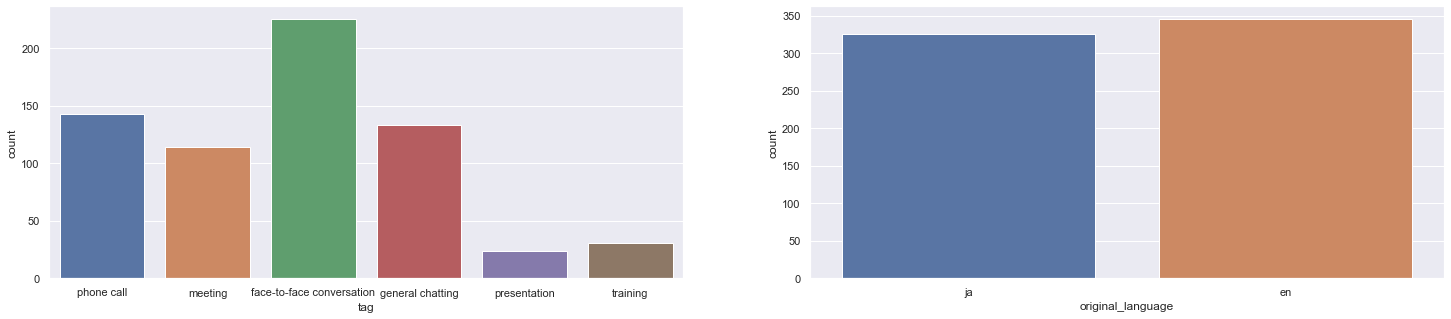

In [80]:
sns.set()
fig, axes = plt.subplots(1, 2, figsize=(25,5))
ax = sns.countplot(x="tag", data=df_train,ax=axes[0])
ax = sns.countplot(x="original_language", data=df_train,ax=axes[1])

Data Split (Document-level (Scene-level))

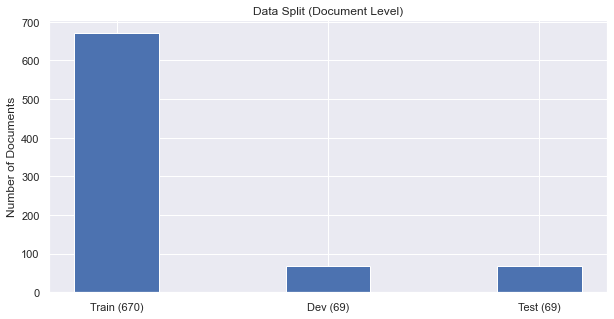

In [104]:
data_doc = {f'Train ({len(df_train.index)})':len(df_train.index), f'Dev ({len(df_dev.index)})':len(df_dev.index), f'Test ({len(df_test.index)})':len(df_test.index)}
x = list(data_doc.keys())
y = list(data_doc.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y,width = 0.4)
 
plt.ylabel("Number of Documents")
plt.title("Data Split (Document Level)")
plt.show()

Data Split (Sentence-level) below

In [149]:
# Count all sentences in entire dataset

tag_lists = ['phone call', 'meeting', 'face-to-face conversation', 'general chatting', 'presentation', 'training']

def count_sents(data):
    
    all_sents = 0
    
    phone_sents = 0
    meet_sents = 0
    face_sents = 0
    chat_sents = 0
    presen_sents = 0
    training_sents = 0
    
    
    for i in range(len(data)):
        sents_in_scenario = len(data['conversation'].iloc[i])
        all_sents += sents_in_scenario
        
        if data['tag'].iloc[i] == 'phone call':
            phone_sents += sents_in_scenario
            
        if data['tag'].iloc[i] == 'meeting':
            meet_sents += sents_in_scenario
                
        if data['tag'].iloc[i] == 'face-to-face conversation':
            face_sents += sents_in_scenario
           
        if data['tag'].iloc[i] == 'general chatting':
            chat_sents += sents_in_scenario
        
        if data['tag'].iloc[i] == 'presentation':
            presen_sents += sents_in_scenario
        
        if data['tag'].iloc[i] == 'training':
            training_sents += sents_in_scenario
            
                
    return (all_sents, phone_sents, meet_sents, face_sents, chat_sents, presen_sents, training_sents) 

print ("Sentence-level Data split")
print (f'Train: {count_sents(df_train)[0]}\nDev  : {count_sents(df_dev)[0]}\nTest : {count_sents(df_test)[0]}')

Sentence-level Data split
Train: 20000
Dev  : 2051
Test : 2120


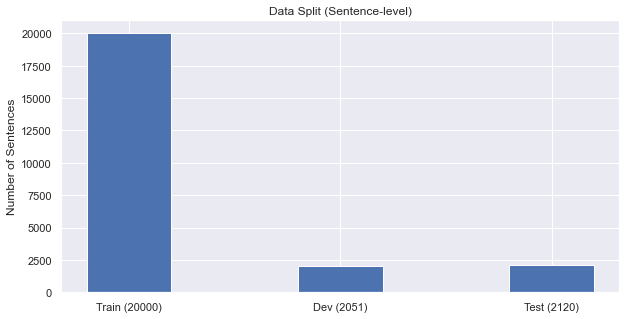

In [105]:
data_sent = {f'Train ({count_sents(df_train)})':count_sents(df_train), f'Dev ({count_sents(df_dev)})': count_sents(df_dev), f'Test ({count_sents(df_test)})':count_sents(df_test)}
x = list(data_sent.keys())
y = list(data_sent.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y,width = 0.4)
 
plt.ylabel("Number of Sentences")
plt.title("Data Split (Sentence-level)")
plt.show()

 Sentence-level scene distribution

In [147]:
print ('Train')
for j in range(len(tag_lists)):
    print ('  ',tag_lists[j],':', count_sents(df_train)[j])
    
print ('Dev')
for j in range(len(tag_lists)):
    print ('  ',tag_lists[j],':', count_sents(df_dev)[j])
    
print ('Test')
for j in range(len(tag_lists)):
    print ('  ',tag_lists[j],':', count_sents(df_test)[j])

Train
   phone call : 20000
   meeting : 4119
   face-to-face conversation : 3751
   general chatting : 6511
   presentation : 3798
   training : 796
Dev
   phone call : 2051
   meeting : 361
   face-to-face conversation : 459
   general chatting : 633
   presentation : 471
   training : 64
Test
   phone call : 2120
   meeting : 375
   face-to-face conversation : 457
   general chatting : 726
   presentation : 423
   training : 71


In [82]:
import sentencepiece as spm

Studying sentencepiece.....below

In [102]:
!spm_train --input="C:/Users/hsmr0/IM/main/data/bsd_ja_train.json", --model_prefix=<model_name> --vocab_size=8000 --character_coverage=1.0 --model_type=bpe

SyntaxError: invalid syntax (2330352871.py, line 1)

In [88]:
sp = spm.SentencePieceProcessor()
sp.Load("C:/Users/hsmr0/IM/main/data")